In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from statsmodels.stats.proportion import proportion_confint

In [10]:
normal_interval = proportion_confint(1, 50, method='normal')

In [11]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


In [22]:
print(f'normal_interval [{normal_interval[0]}, {normal_interval[1]}] with width {normal_interval[1] - normal_interval[0]}')

normal_interval [0.0, 0.05880530708179099] with width 0.05880530708179099


In [23]:
wilson_interval = proportion_confint(1, 50, method='wilson')

In [24]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


In [25]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [26]:
random_sample = (49 * 0 + 1) / 50

In [39]:
int(np.ceil(samplesize_confint_proportion(random_sample, 0.01)))

753

In [30]:
from scipy import stats as st

In [35]:
n = 50
p = 0.02

In [37]:
n_int = st.norm.ppf((1+0.95)/2)*(p*(1-p)/n)**0.5

In [38]:
print(f'normal_interval [{n_int}, {normal_interval[1]}] with width {normal_interval[1] - n_int}')

normal_interval [0.038805307081790974, 0.05880530708179099] with width 0.020000000000000018


In [48]:
def proportion_confint_2(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1 / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = st.norm.isf(alpha / 2) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return round(ci_low, 4), round(ci_upp, 4)

In [49]:
proportion_confint_2(1, 50)

(-0.0188, 0.0588)

In [61]:
arr = []
for p in np.arange(0, 1, 0.01):
    n_int = st.norm.ppf((1+0.95) / 2) * (p * (1-p) / n) ** 0.5
    arr.append(n_int)

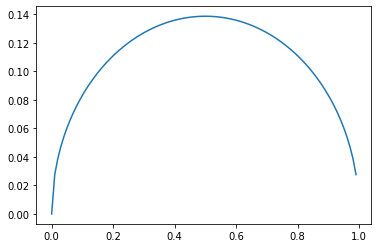

In [63]:
plt.plot(np.arange(0, 1., 0.01), arr);

In [68]:
n_int = st.norm.ppf((1+0.95) / 2) * (0.5 * (1-0.5) / n) ** 0.5

In [69]:
int(np.ceil(samplesize_confint_proportion(n_int, 0.01)))

4587